# <font color="Purple"><h4 align="center">Hospitality Management</h4></font>

***
### <font color="Blue">**Import Libraries**</font>
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


***
### <font color="Blue">**Data Import**</font>
***

In [2]:
#for date.csv
date = pd.read_csv(r"C:\Users\User\OneDrive\Documents\DA_prep\Python\p1\dim_date.csv")

#for hotel.csv
hotel = pd.read_csv(r"C:\Users\User\OneDrive\Documents\DA_prep\Python\p1\dim_hotels.csv")

#for rooms.csv
room = pd.read_csv(r"C:\Users\User\OneDrive\Documents\DA_prep\Python\p1\dim_rooms.csv")

#for fact_aggregate_bookings.csv
agg_bookings = pd.read_csv(r"C:\Users\User\OneDrive\Documents\DA_prep\Python\p1\fact_aggregated_bookings.csv")

#for fact_bookings.csv
bookings = pd.read_csv(r"C:\Users\User\OneDrive\Documents\DA_prep\Python\p1\fact_bookings.csv")

#for new_aug_data.csv
new_data = pd.read_csv(r"C:\Users\User\OneDrive\Documents\DA_prep\Python\p1\new_data_august.csv")




***
### <font color="Blue">**Explore Data**</font>
***

**Explore bookings data**

In [3]:
bookings.shape

(134590, 12)

In [4]:
bookings.head()


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [5]:
bookings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [6]:
bookings.describe()


,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [7]:
bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [8]:
bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [9]:
bookings.ratings_given.unique()

array([ 1., nan,  5.,  4.,  3.,  2.])

In [ ]:
bookings.booking_status.unique()

array(['Checked Out', 'Cancelled', 'No Show'], dtype=object)

In [11]:
bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

In [ ]:
bookings.room_category.value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

In [13]:
bookings.booking_status.value_counts()

booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64

In [14]:
bookings.isna().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in booking table is 134590. Out of that 77907 rows has null rating. Since there are many rows with null rating, we should not replace this rating with a median or mean rating etc and should not filter these values.

 <font color="Red">**Grouping the table by booking platform ="direct online"**</font>

In [15]:
grp_1 = bookings.groupby("booking_platform")
grp_platform = grp_1.get_group("direct online")
grp_platform

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
38,May012216558RT221,16558,25-04-22,1/5/2022,3/5/2022,2.0,RT2,direct online,5.0,Checked Out,12600,12600
57,May012216559RT18,16559,28-04-22,1/5/2022,3/5/2022,1.0,RT1,direct online,NaN,Cancelled,11050,4420
76,May012216559RT22,16559,28-04-22,1/5/2022,6/5/2022,2.0,RT2,direct online,3.0,Checked Out,15300,15300
...,...,...,...,...,...,...,...,...,...,...,...,...
134563,Jul312217564RT214,17564,28-07-22,31-07-22,1/8/2022,2.0,RT2,direct online,NaN,Cancelled,15300,6120
134571,Jul312217564RT33,17564,30-07-22,31-07-22,4/8/2022,3.0,RT3,direct online,NaN,Checked Out,22440,22440
134572,Jul312217564RT34,17564,7/7/2022,31-07-22,1/8/2022,1.0,RT3,direct online,1.0,Checked Out,20400,20400
134573,Jul312217564RT35,17564,31-07-22,31-07-22,1/8/2022,2.0,RT3,direct online,NaN,No Show,20400,20400


**Explore aggregate booking data**

In [16]:
agg_bookings.shape


(9200, 5)

In [17]:
agg_bookings.head()


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [18]:
agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [19]:
agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [20]:
agg_bookings.room_category.unique()


array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [21]:
agg_bookings.room_category.value_counts()

room_category
RT1    2300
RT2    2300
RT3    2300
RT4    2300
Name: count, dtype: int64

Total bookings per id 

In [22]:
agg_bookings.groupby("property_id")["successful_bookings"].sum().sort_values(ascending=False)

property_id
16559    7338
18562    7333
16563    7211
18560    6638
18561    6458
17563    6337
17559    6142
19560    6079
17560    6013
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5053
16562    4820
18563    4737
19559    4729
16560    4693
18558    4475
16561    4418
19558    4400
17564    3982
17562    3424
16558    3153
Name: successful_bookings, dtype: int64

bookings greater,less than and equal to capacity

In [23]:
greater=agg_bookings[agg_bookings.successful_bookings > agg_bookings.capacity]
greater


,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [24]:
less=agg_bookings[agg_bookings.successful_bookings < agg_bookings.capacity]
less

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [25]:
equal_to=agg_bookings[agg_bookings.successful_bookings == agg_bookings.capacity]
equal_to

,property_id,check_in_date,room_category,successful_bookings,capacity
24,19562,1-May-22,RT2,23,23.0
29,16561,1-May-22,RT2,24,24.0
60,16561,1-May-22,RT3,21,21.0
69,16558,1-May-22,RT3,8,8.0
99,16558,1-May-22,RT4,3,3.0
...,...,...,...,...,...
7699,16558,16-Jul-22,RT4,3,3.0
7999,16558,19-Jul-22,RT4,3,3.0
8399,16558,23-Jul-22,RT4,3,3.0
8499,16558,24-Jul-22,RT4,3,3.0


In [26]:
agg_bookings.capacity.max()

50.0

In [27]:
equal_to_max=agg_bookings[agg_bookings.capacity == agg_bookings.capacity.max()]
equal_to_max

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


**Explore date data**

In [28]:
date.shape

(92, 4)

In [29]:
date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [30]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [31]:
date.describe()

,date,mmm yy,week no,day_type
count,92,92,92,92
unique,92,3,14,2
top,01-May-22,May 22,W 19,weekeday
freq,1,31,7,65


In [32]:
date.day_type.value_counts()

day_type
weekeday    65
weekend     27
Name: count, dtype: int64

**Explore hotel data**

In [33]:
hotel.shape

(25, 4)

In [34]:
hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [35]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [36]:
hotel.describe()

,property_id
count,25.000000
mean,18040.640000
std,1122.436371
min,16558.000000
25%,17558.000000
50%,17564.000000
75%,18563.000000
max,19563.000000


In [37]:
hotel.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [38]:
hotel.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

**Explore room data**

In [39]:
room.shape

(4, 2)

In [40]:
room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [41]:
room.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [42]:
room.room_id.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [43]:
room.room_class.unique()

array(['Standard', 'Elite', 'Premium', 'Presidential'], dtype=object)

***
### <font color="Blue">**Data Cleaning**</font>
***

**Data cleaning for booking table**


 <font color="Red">**Remove negative values from bookings table**</font>

In [44]:
invalid_guest = bookings[bookings.no_guests<=0]
invalid_guest


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [45]:
df_bookings = bookings[bookings.no_guests>=0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


 <font color="Red">**Verifying there is any negative values in each and every column from
booking table**</font>

In [46]:
bookings_1 = df_bookings[df_bookings.ratings_given < 0]
bookings_1


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [47]:
bookings_2 = df_bookings[df_bookings.revenue_generated<0]
bookings_2


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [48]:
bookings_3 = df_bookings[df_bookings.revenue_realized<0]
bookings_3

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


 <font color="Red">**Count of rows and columns before cleaning" file**</font>

In [49]:
bookings.shape

(134590, 12)

 <font color="Red">**Count of rows and columns after cleaning" file**</font>

In [50]:
df_bookings.shape

(134578, 12)

In [51]:
invalid_guest.shape

(9, 12)

Total rows before data cleaning is 134590 and after data cleaning is 134578 and we remove the invalid guest because it contains negative values in that column. By subtracting the before and after cleaning data , we found 9 rows which contains negative values and remaining values are empty. Here, We are going to fill those values with the median values of that column.

In [52]:
df_bookings.fillna("2",inplace= True)


C:\Users\User\AppData\Local\Temp\ipykernel_18904\150719648.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_bookings.fillna("2",inplace= True)
C:\Users\User\AppData\Local\Temp\ipykernel_18904\150719648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bookings.fillna("2",inplace= True)


 <font color="Red">**Calculating min,max,avg,std_dev for revenue_generated column in df_bookings table**</font>

In [53]:
min_gen,max_gen=df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()
min_gen, max_gen


(6500, 28560000)

In [54]:
avg_gen,std_dev_gen=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()
avg_gen, std_dev_gen

(15378.036937686695, 93040.15493143328)

 <font color="Red">**Calculating 3_std_dev to check whether there is an outliers in revenue_generated
column**</font>

In [55]:
lower_limit_gen = avg_gen - 3*std_dev_gen
lower_limit_gen

-263742.4278566132

In [56]:
higher_limit_gen = avg_gen + 3*std_dev_gen
higher_limit_gen


294498.50173198653

 <font color="Red">**Here, we found that there is an outlier in revenue_generated column by comparing
max and higher limit of that column**</font>

Outliers of revenue_generated column

In [ ]:
outliers_gen = df_bookings[df_bookings.revenue_generated >= higher_limit_gen]
outliers_gen


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,2,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,2,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


Removing those outliers

In [58]:
outlier_gen_1 = df_bookings[df_bookings.revenue_generated <= higher_limit_gen]
outlier_gen_1


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,2,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,2,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,2,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,2,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


 <font color="Red">**Calculating min,max,avg,std_dev for revenue_realized column in bookings table**</font>

In [59]:
min_real,max_real=bookings.revenue_realized.min(),bookings.revenue_realized.max()
min_real, max_real


(2600, 45220)

In [60]:
avg_real,std_dev_real=bookings.revenue_realized.mean(),bookings.revenue_realized.std()
avg_real, std_dev_real

(12696.123255813953, 6928.108124023166)

 <font color="Red">**Calculating 3_std_dev to check whether there is an outliers in revenue_realized
column**</font>

In [61]:
lower_limit_real = avg_real - 3*std_dev_real
lower_limit_real


-8088.201116255546

In [62]:
higher_limit_real = avg_real + 3*std_dev_real
higher_limit_real


33480.44762788345

In [63]:
outlier_real =df_bookings[df_bookings.revenue_realized <= higher_limit_real]
outlier_real


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,2,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,2,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,2,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [64]:
outlier_real_1 = df_bookings[df_bookings.revenue_realized >= higher_limit_real]
outlier_real_1


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,2,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,2,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


 <font color="Red">**We are having same room category="RT4" for all the rows. Here we need to
calculate 3_std_dev for room_category column to find whether there is outliers or
not**</font>

In [65]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [66]:
higher_limit_room = 23439.308444 + 3* 9048.599076
higher_limit_room


50585.105672000005

Max value(45220) is less than higher limit of room category column(50585).Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column.

In [67]:
df_bookings.isna().sum()

booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
ratings_given        0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64

**Data Cleaning Process for agg_fact_bookings table**


 <font color="Red">**Verify there is any negative values in each and every column from
agg_fact_booking table**</font>

In [68]:
agg_fact_booking=agg_bookings[agg_bookings.successful_bookings<=0]
agg_fact_booking


,property_id,check_in_date,room_category,successful_bookings,capacity


In [69]:
agg_fact_booking_1=agg_bookings[agg_bookings.successful_bookings>=0]
agg_fact_booking_1


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [70]:
agg_fact_booking_2=agg_bookings[agg_bookings.capacity<=0]
agg_fact_booking_2


,property_id,check_in_date,room_category,successful_bookings,capacity


In [ ]:
agg_fact_booking_3=agg_bookings[agg_bookings.capacity>=0]
agg_fact_booking_3


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [72]:
agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [73]:
higher_limit_bookings = 14.655761 + 3*7.736170
higher_limit_bookings

37.864271

In [74]:
higher_limit_capacity = 25.280496 + 3*11.442080
higher_limit_capacity

59.606736

 <font color="Red">**There is no negative values in agg_booking table. So there is no changes in the
rows and columns**</font>

In [75]:
agg_bookings.shape

(9200, 5)

In [76]:
agg_bookings.isna().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

 <font color="Red">**Here, we are having two null values in the capacity column. To handle this null
values, we just fill the null value with median of that particular column**</font>

In [77]:
agg_bookings.capacity.median()


25.0

In [78]:
agg_bookings.fillna("25",inplace=True)
agg_bookings


C:\Users\User\AppData\Local\Temp\ipykernel_18904\398658583.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  agg_bookings.fillna("25",inplace=True)


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [79]:
agg_bookings.isna().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

***
### <font color="Blue">**Data Transformation**</font>
***

 <font color="black">**1. Creating new column**</font>
 
 <font color="black">**2. Merging data**</font>

In [80]:
print(agg_bookings.dtypes)

property_id             int64
check_in_date          object
room_category          object
successful_bookings     int64
capacity               object
dtype: object


Here the data type of successful_bookings and capacity columns are different.We are changing those columns datatypes to numeric to calculate the occpancy percentage.

In [81]:
agg_bookings['successful_bokkings']= pd.to_numeric(agg_bookings["successful_bookings"], errors="coerce")
agg_bookings["capacity"] = pd.to_numeric(agg_bookings["capacity"], errors="coerce")

In [82]:
agg_bookings["occ_percent"] = (agg_bookings["successful_bookings"] / agg_bookings["capacity"])*100
agg_bookings['occ_percent']

0        83.333333
1        93.333333
2        76.666667
3       157.894737
4        94.736842
           ...    
9195     72.222222
9196     72.222222
9197     50.000000
9198     50.000000
9199     75.000000
Name: occ_percent, Length: 9200, dtype: float64

In [83]:
agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,successful_bokkings,occ_percent
0,16559,1-May-22,RT1,25,30.0,25,83.333333
1,19562,1-May-22,RT1,28,30.0,28,93.333333
2,19563,1-May-22,RT1,23,30.0,23,76.666667
3,17558,1-May-22,RT1,30,19.0,30,157.894737
4,16558,1-May-22,RT1,18,19.0,18,94.736842
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,13,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,13,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,3,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,3,50.000000


In [84]:
merge=pd.merge(agg_bookings,room,left_on="room_category",right_on="room_id")
merge.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,successful_bokkings,occ_percent,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,25,83.333333,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,28,93.333333,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,23,76.666667,RT1,Standard


In [85]:
merge_1= pd.merge(merge,hotel, on="property_id")
merge_1.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,successful_bokkings,occ_percent,room_id,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,25,83.333333,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,28,93.333333,RT1,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,23,76.666667,RT1,Standard,Atliq Palace,Business,Bangalore


In [86]:
merge_2 = pd.merge(merge_1,date, left_on="check_in_date", right_on="date")
merge_2.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,successful_bokkings,occ_percent,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,15,51.724138,RT3,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,19,63.333333,RT1,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,18,60.000000,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [87]:
latest_data = pd.concat([merge, new_data], ignore_index = True, axis = 0)
latest_data.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,successful_bokkings,occ_percent,room_id,room_class,property_name,category,city,mmm yy,week no,day_type,occ%
9197,17558,31-Jul-22,RT4,3,6.0,3.0,50.0,RT4,Presidential,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9198,19563,31-Jul-22,RT4,3,6.0,3.0,50.0,RT4,Presidential,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9199,17561,31-Jul-22,RT4,3,4.0,3.0,75.0,RT4,Presidential,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9200,16559,01-Aug-22,RT1,30,30.0,NaN,NaN,NaN,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday,100.00
9201,19562,01-Aug-22,RT1,21,30.0,NaN,NaN,NaN,Standard,Atliq Bay,Luxury,Bangalore,Aug-22,W 32,weekeday,70.00
9202,19563,01-Aug-22,RT1,23,30.0,NaN,NaN,NaN,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday,76.67
9203,19558,01-Aug-22,RT1,30,40.0,NaN,NaN,NaN,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday,75.00
9204,19560,01-Aug-22,RT1,20,26.0,NaN,NaN,NaN,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,76.92
9205,17561,01-Aug-22,RT1,18,26.0,NaN,NaN,NaN,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday,69.23
9206,17564,01-Aug-22,RT1,10,16.0,NaN,NaN,NaN,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday,62.50


***
### <font color="Blue">**Insights Generation**</font>
***

Average occupancy rate in each of the room categories

In [88]:
merge.groupby("room_category")["occ_percent"].mean()

room_category
RT1    58.232716
RT2    58.040234
RT3    58.028291
RT4    59.300161
Name: occ_percent, dtype: float64

Average occupancy rate in each of the room class

In [89]:
merge.groupby("room_class")["occ_percent"].mean()

room_class
Elite           58.040234
Premium         58.028291
Presidential    59.300161
Standard        58.232716
Name: occ_percent, dtype: float64

In [90]:
merge[merge.room_class=="Presidential"].occ_percent.mean()

59.300161116197934

Average occupancy rate per city

In [91]:
merge_1.groupby("city")["occ_percent"].mean()

city
Bangalore    56.594061
Delhi        61.606265
Hyderabad    58.144464
Mumbai       57.943286
Name: occ_percent, dtype: float64

Find that Occupancy is better in Weekdays or Weekend

In [92]:
merge_2.groupby("day_type")["occ_percent"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_percent, dtype: float64

Occupancy percentage based on category and property_name

In [93]:
merge_2.groupby("category")["occ_percent"].mean().round(2)

category
Business    56.93
Luxury      57.33
Name: occ_percent, dtype: float64

In [94]:
merge_2.groupby("property_name")["occ_percent"].mean().round(2)

property_name
Atliq Bay        56.74
Atliq Blu        61.91
Atliq City       58.50
Atliq Exotica    56.61
Atliq Grands     54.05
Atliq Palace     58.67
Atliq Seasons    43.71
Name: occ_percent, dtype: float64

In [95]:
merge_2["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

Identifying Occupancy percentage based on check_in_date for different cities

In [96]:
may_22 = merge_2[merge_2["mmm yy"]=="May 22"]
may_22.head(2)


,property_id,check_in_date,room_category,successful_bookings,capacity,successful_bokkings,occ_percent,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,15,51.724138,RT3,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,19,63.333333,RT1,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday


In [97]:
may_22.groupby('city')['occ_percent'].mean().round(2).sort_values(ascending=False)

city
Delhi        59.65
Hyderabad    57.06
Mumbai       56.80
Bangalore    55.28
Name: occ_percent, dtype: float64

In [98]:
jun_22 = merge_2[merge_2["mmm yy"]=="Jun 22"]
jun_22.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,successful_bokkings,occ_percent,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,20,66.666667,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,19,63.333333,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday


In [99]:
jun_22.groupby('city')['occ_percent'].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_percent, dtype: float64

In [100]:
july_22 = merge_2[merge_2["mmm yy"]=="Jul 22"]
july_22.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,successful_bokkings,occ_percent,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
4300,16559,10-Jul-22,RT1,26,30.0,26,86.666667,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4301,19562,10-Jul-22,RT1,26,30.0,26,86.666667,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-Jul-22,Jul 22,W 29,weekend


In [101]:
july_22.groupby('city')['occ_percent'].mean().round(2).sort_values(ascending=False)

city
Delhi        59.18
Hyderabad    55.36
Mumbai       55.24
Bangalore    54.07
Name: occ_percent, dtype: float64

Here we find that highest occupancy percentage based on different cities by comparing all three months is Delhi and for lowest occupancy percentage occurs in Bangalore.

In [102]:
bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


Revenue realized per city

In [103]:
bookings_all = pd.merge(bookings, hotel, on="property_id")
bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [104]:
bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

Revenue realized per hotel type

In [105]:
bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [106]:
bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     66125495
Atliq Grands     211532764
Atliq Bay        260051178
Atliq Blu        260855522
Atliq City       285811939
Atliq Palace     304081863
Atliq Exotica    320312468
Name: revenue_realized, dtype: int64

Average rating per city

In [107]:

bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

Average rating per city

In [108]:
bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

In [109]:
pivot_table_1 = merge_2.pivot_table (
    values = ('occ_percent'),
    columns = ('city'),
    index = ('day_type','category','room_id','room_class'),
    aggfunc = 'mean'
)
pivot_table_1

city                                    Bangalore      Delhi  Hyderabad  \
day_type category room_id room_class                                      
weekeday Business RT1     Standard      52.586399  52.730647  51.739130   
                  RT2     Elite         51.855454  51.921524  51.610757   
                  RT3     Premium       50.781188  52.771739  50.899890   
                  RT4     Presidential  52.536232  52.242926  52.910628   
         Luxury   RT1     Standard      47.463768  52.923567  49.834282   
                  RT2     Elite         47.146188  53.549716  50.155027   
                  RT3     Premium       47.370858  53.742524  50.016875   
                  RT4     Presidential  48.964803  58.840580  49.445398   
weekend  Business RT1     Standard      74.480432  75.349241  73.118908   
                  RT2     Elite         74.192059  75.171093  75.226860   
                  RT3     Premium       74.935524  73.815789  75.309878   
                  RT4     Presidential  75.054825  74.185464  75.555556   
         Luxury   RT1     Standard      67.967836  76.184732  70.712157   
                  RT2     Elite         69.001194  76.577278  71.073565   
                  RT3     Premium       67.292753  77.363548  72.037657   
                  RT4     Presidential  67.512531  79.707602  71.606648   

city                                       Mumbai  
day_type category room_id room_class               
weekeday Business RT1     Standard      46.898551  
                  RT2     Elite         48.781474  
                  RT3     Premium       47.679348  
                  RT4     Presidential  46.304676  
         Luxury   RT1     Standard      51.887788  
                  RT2     Elite         51.265051  
                  RT3     Premium       51.928712  
                  RT4     Presidential  55.607315  
weekend  Business RT1     Standard      67.561404  
                  RT2     Elite         67.915559  
                  RT3     Premium       69.782164  
                  RT4     Presidential  67.172217  
         Luxury   RT1     Standard      73.362615  
                  RT2     Elite         73.300311  
                  RT3     Premium       74.049708  
                  RT4     Presidential  73.475355

In [110]:
pivot_table_1.max()


city
Bangalore    75.054825
Delhi        79.707602
Hyderabad    75.555556
Mumbai       74.049708
dtype: float64

Here, we find that the maximum booking is done in Delhi during weekends in Luxury Category.

***
### <font color="Blue">**Data Visualization**</font>
***

Pie chart for room_category column

<Axes: ylabel='count'>

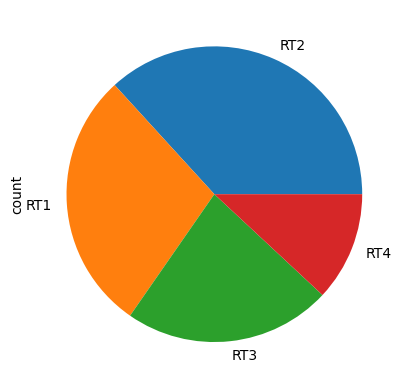

In [111]:
bookings.room_category.value_counts().plot(kind="pie")

Bar chart for booking_status column where we are customizing color for the bars

<Axes: ylabel='booking_status'>

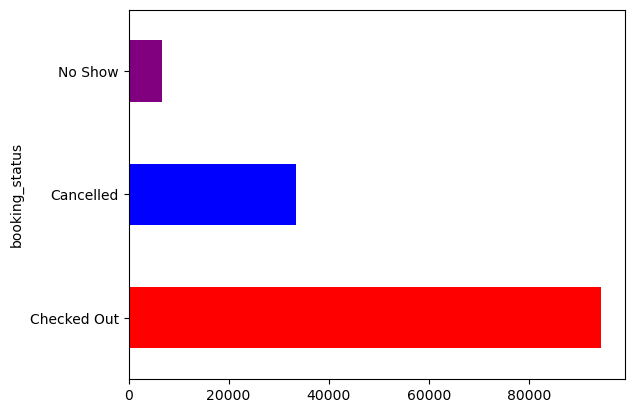

In [112]:
bookings.booking_status.value_counts().plot(kind="barh",color=["red","blue","purple"])

Bar chart for booking_platform column using plotly.express library which showsdifferent colors for each and every bar

In [113]:
import plotly.express as px

booking_counts=bookings["booking_platform"].value_counts()
fig=px.bar(booking_counts,x=booking_counts.values,y=booking_counts.index,orientation='h', color=booking_counts.values)
fig.show()

Bar chart for booking_platform column which shows the highest value in greencolor and remaining all in blue color

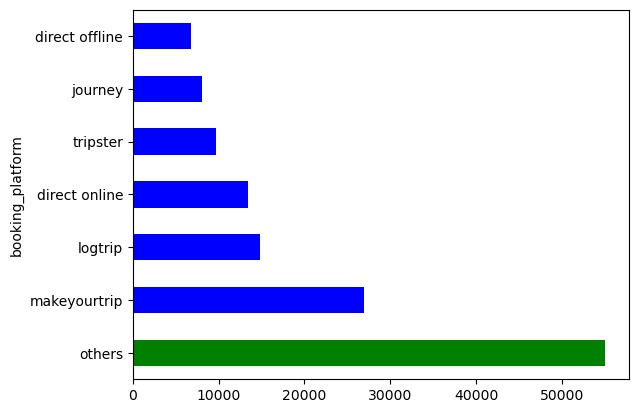

In [114]:
high=bookings.booking_platform.value_counts()
colors = ["green" if platform == "others" else "blue" for platform in high.index]
high.plot(kind="barh",color=colors)
plt.show()